## Titanic -Machine Learning Challenge using Classification Models

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read train and test csv data
train_data=pd.read_csv('titanic/train.csv')
test_data=pd.read_csv('titanic/test.csv')

In [3]:
#copy of tain and test data
testing=test_data.copy()
training=train_data.copy()

# Data Understanding


In [4]:
#view the data in train and test sets
train_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#check for null values in train  data
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#checking for numll values in test_data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#to check the data types of each column
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Analysis

In [9]:
#iterate each column to find the nan values
features_with_nan=[features for features in train_data.columns if train_data[features].isnull().sum()>1]
for feature in features_with_nan:
    print(feature,":  ",train_data[feature].isnull().sum())

Age :   177
Cabin :   687
Embarked :   2


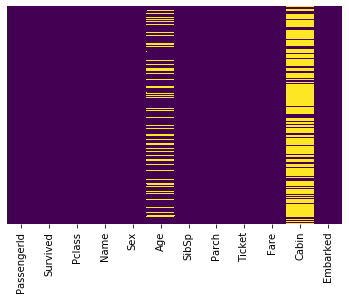

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

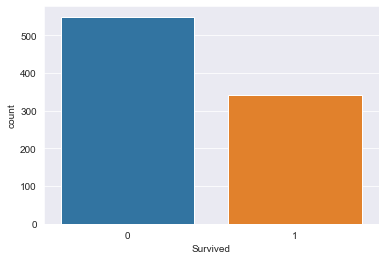

In [11]:
#to check the number of survived and not survivied people
sns.set_style('darkgrid')
sns.countplot(train_data["Survived"])

It can be observed that more than 550 are not survived (indicated by 0) and around 320 (approx.) are survived (indicated by 1)

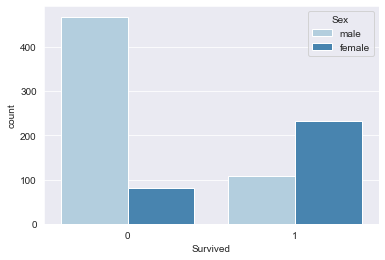

In [12]:
sns.set_style("darkgrid")
sns.countplot(x="Survived",hue="Sex",data=train_data,palette='Blues')

It shows, mostly Males are not survived as we know that females and kids were saved by boats from movie.

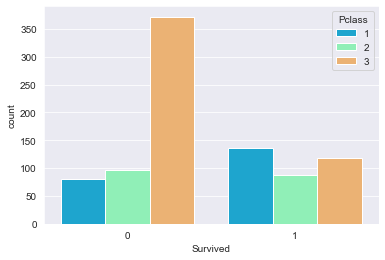

In [13]:
#check the survival information based on PClass
sns.countplot(x="Survived",hue="Pclass",data=train_data,palette="rainbow")

We know, more people from 3rd class are not survived whereas people from  1st class are survived.

In [14]:
#find the average, minimum and maximum ages travelling
train_data.Age.apply(["max","min","mean","median",np.std])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
std       14.526497
Name: Age, dtype: float64

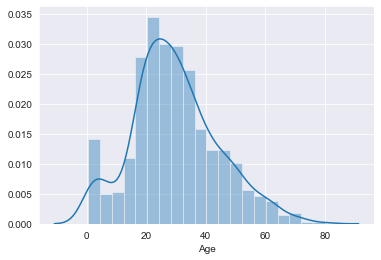

In [15]:
#Age distribution using distplot
sns.distplot(train_data["Age"].dropna(),kde=True)

Is can be observed that mostly effected age group are adults who are >18 and there are 113 children who are below <18. 

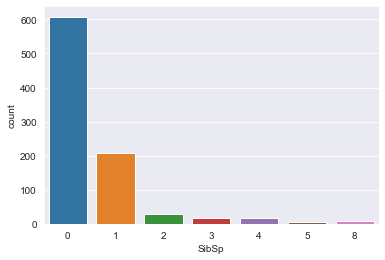

In [16]:
sns.countplot(x="SibSp",data=train_data)

From the above graph, it is observed that most of the people are with no siblings and spouse. Next higher is people with 1 sibling or spouse.

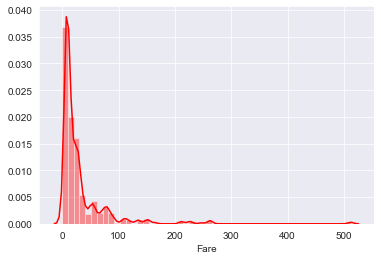

In [17]:
#will see how fare is distributed
sns.distplot(train_data["Fare"],color="r")

# Data Cleaning

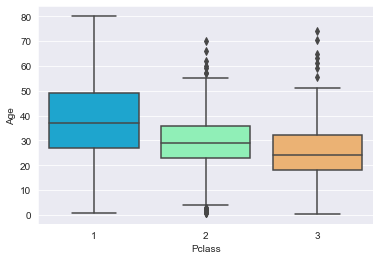

In [18]:
#check for outliers in Age
sns.boxplot(x="Pclass",y="Age",data=train_data,palette="rainbow")

From the boxplot, I can find the average age of a person in each class to fill the NaN values through imputation.

In [19]:
def impute_age(cols):
    """
    function to fill the Nan values in Age with 50th percentile value
    params: columns [Age,Pclass]
    return: age
    """
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else: 
            return 25
        
    else :
        return Age

    
    

In [20]:
train_data["Age"]=train_data[["Age","Pclass"]].apply(impute_age,axis=1)

In [21]:
#train_data["Age"].fillna(train_data["Age"].std(),inplace=True)

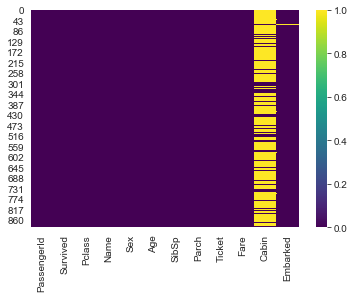

In [22]:
#check if Age column is still having the NaN
sns.heatmap(train_data.isnull(),cmap="viridis")

In [23]:
#cleaning Fare column
#train_data["Fare"].sort_values().unique()
#train_data["Fare"].describe()
def fare_impute(fare):
    """
    function to impute the Fare column
    parameters: fare
    return [1,2,3,4] categories for different fares
    
    """

    if fare<15:
        return 1
    elif (fare>15 and fare<50):
        return 2
    elif (fare>50 and fare<200):
        return 3
    else:
        return 4
    
train_data["Fare"]=train_data["Fare"].apply(fare_impute)    


In [24]:
#check the most frequent and unique data from objects 
train_data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Mr. Charles Edward",male,1601,G6,S
freq,1,577,7,4,644


# Feature Engineering

In [25]:
#Cabin column have so many null values, so remove it
#train_data.drop("Cabin",axis=1,inplace=True)

#train_data["Cabin"]=train_data["Cabin"].fillna(0)
train_data["Cabin_new"]=np.where(train_data["Cabin"].isna(),0,1)

In [26]:
train_data["Cabin_new"]

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin_new, Length: 891, dtype: int32

In [27]:
#drop the null data if any
#train_data.dropna(inplace=True)

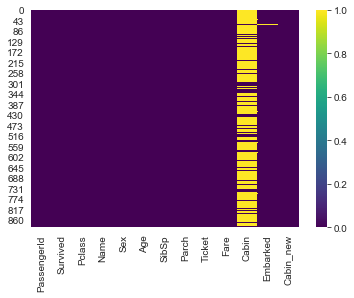

In [28]:
#check if Age column is still having the NaN
sns.heatmap(train_data.isnull(),cmap="viridis")

In [29]:
#converting categorical data into numerical values for model
cat_sex_emb=pd.get_dummies(train_data[["Sex","Embarked"]],drop_first=True)

In [30]:
#drop unnecessary columns
train_data.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Cabin_new
0,1,0,3,22.0,1,0,1,NaN,0
1,2,1,1,38.0,1,0,3,C85,1
2,3,1,3,26.0,0,0,1,NaN,0
3,4,1,1,35.0,1,0,3,C123,1
4,5,0,3,35.0,0,0,1,NaN,0


In [32]:
#combining the columns
train_data=pd.concat([train_data,cat_sex_emb],axis=1)

In [34]:
train_data.drop("Cabin",inplace=True,axis=1)

In [35]:
train_data.drop("Cabin_new",inplace=True,axis=1)

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,1,1,0,1
1,2,1,1,38.0,1,0,3,0,0,0
2,3,1,3,26.0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,3,0,0,1
4,5,0,3,35.0,0,0,1,1,0,1


In [119]:
train_data.drop(["Embarked_Q","Embarked_S"],inplace=True,axis=1)

# Data Cleaning for test_data

In [38]:
#find the columns 
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

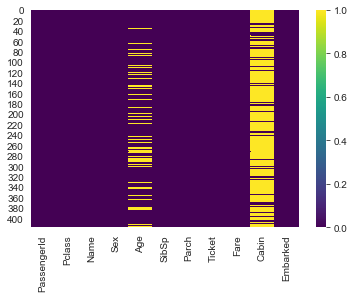

In [39]:
#check for null values in test data
sns.heatmap(test_data.isnull(),cmap="viridis")

In [40]:
#test_data["Age"].fillna(test_data["Age"].std(),inplace=True)

In [41]:
test_data["Age"]=test_data[["Age","Pclass"]].apply(impute_age,axis=1)

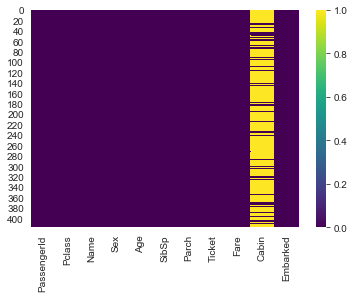

In [42]:
#check for null values in test data
sns.heatmap(test_data.isnull(),cmap="viridis")

In [43]:
#drop unnecessary columns
test_data.drop(["Name","Ticket"],inplace=True,axis=1)

In [44]:
#convert categorical to numerical values

sex_emb=pd.get_dummies(test_data[["Sex","Embarked"]],drop_first=True)

In [45]:
#drop Sex and Embarked columns as they are present with dummies
test_data.drop(["Sex","Embarked"],inplace=True,axis=1)

In [46]:
test_data["Cabin_new"]=np.where(test_data["Cabin"].isna(),0,1)

In [47]:
#combine all the columns
test_data=pd.concat([test_data,sex_emb],axis=1)

In [48]:
test_data.drop("Cabin",inplace=True,axis=1)

In [50]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin_new      0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [51]:
test_data["Fare"]=test_data["Fare"].apply(fare_impute)    


In [52]:
test_data["Fare"].fillna(test_data["Fare"].mean(),inplace=True)

In [53]:
test_data.drop("Cabin_new",axis=1,inplace=True)

In [54]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,1,1,1,0
1,893,3,47.0,1,0,1,0,0,1
2,894,2,62.0,0,0,1,1,1,0
3,895,3,27.0,0,0,1,1,0,1
4,896,3,22.0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,25.0,0,0,1,1,0,1
414,1306,1,39.0,0,0,3,0,0,0
415,1307,3,38.5,0,0,1,1,0,1
416,1308,3,25.0,0,0,1,1,0,1


# Classification Models

## Logistic Resgression Model

In [120]:
X=train_data.drop(["Survived"],axis=1)
y=train_data["Survived"]

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4685,random_state=5)

In [125]:
logreg=LogisticRegression()

In [126]:
logreg.fit(X_train,y_train)

C:\Users\manasa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [127]:
predictions=logreg.predict(X_test)

In [129]:
#finds the accuracy of the model
logreg.score(X_test,y_test)

0.8301435406698564

In [130]:
#shows the person survived or not based on PassengerId
submission=pd.DataFrame({"PassengerId":test_data["PassengerId"],"Survived":predictions})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [131]:
submission.to_csv('final_titanic_model_submission.csv',index = False)

It can be observed that among Logistic Regression, Random Forest and KNN, Logistic Regression perfoms well with 84.3% accuracy. 

In [132]:
#finds the accuracy of the model
accuracy_score(y_test,predictions)

0.8301435406698564

## K Nearest Neighbors Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knc=KNeighborsClassifier()

In [110]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
pred_knn=knc.predict(X_test)

In [112]:
knc.score(X_test,y_test)

0.5191387559808612

In [113]:
pred_knn

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

## RandomForest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc=RandomForestClassifier(n_estimators=100)

In [116]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
pred_rfc=rfc.predict(X_test)

In [118]:
rfc.score(X_test,y_test)

0.8014354066985646